In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file to examine its structure
file_path = "C:/Users/singh/Downloads/mobile_mba_dataset.xlsx"
df = pd.read_excel(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   TransactionID       2000 non-null   int64
 1   iPhone 14           2000 non-null   int64
 2   iPhone 14 Case      2000 non-null   int64
 3   Wireless Charger    2000 non-null   int64
 4   Screen Protector    2000 non-null   int64
 5   Power Bank          2000 non-null   int64
 6   Samsung Galaxy S22  2000 non-null   int64
 7   Samsung Case        2000 non-null   int64
 8   Bluetooth Earbuds   2000 non-null   int64
 9   USB-C Cable         2000 non-null   int64
 10  Car Phone Mount     2000 non-null   int64
 11  Tablet Stand        2000 non-null   int64
 12  Apple Watch         2000 non-null   int64
 13  Smartwatch Strap    2000 non-null   int64
 14  VR Headset          2000 non-null   int64
 15  Portable Speaker    2000 non-null   int64
dtypes: int64(16)
memory usage: 250.1 KB


C:\Users\singh\AppData\Local\Temp\ipykernel_9384\4039990813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prod_counts.index, y=prod_counts.values, palette = 'Dark2')


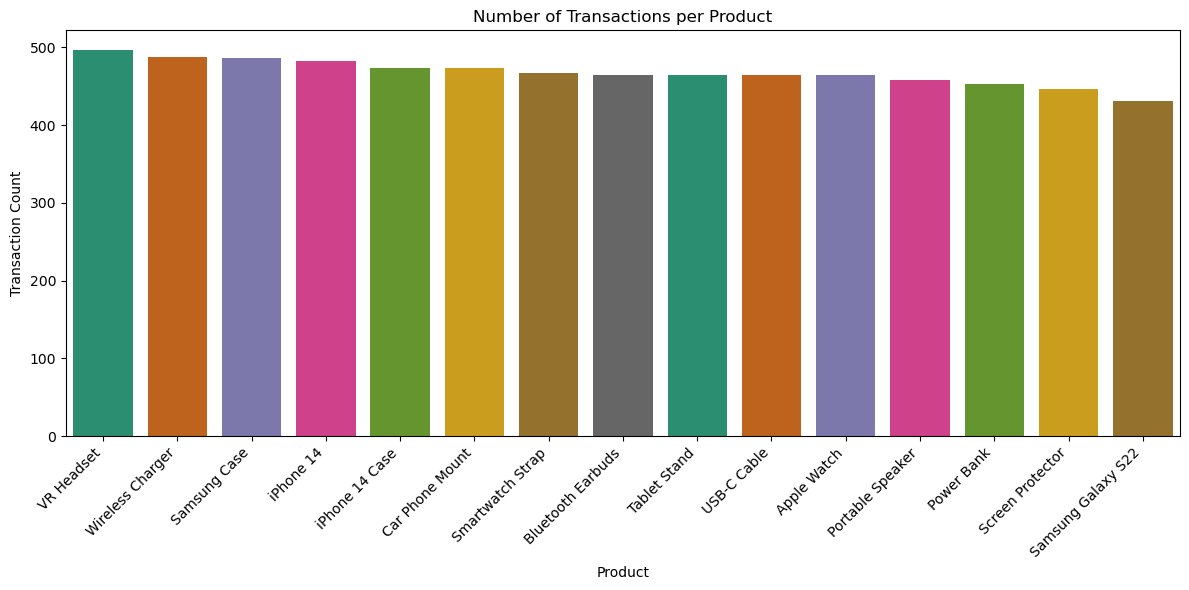

In [2]:
#question 1 

prod_df=df.drop(columns=["TransactionID"])
prod_counts = prod_df.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=prod_counts.index, y=prod_counts.values, palette = 'Dark2')
plt.xticks(rotation=45, ha="right")
plt.title("Number of Transactions per Product")
plt.xlabel("Product")
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()

C:\Users\singh\AppData\Local\Temp\ipykernel_9384\3436574310.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_prod.values, y=top5_prod.index, palette="crest")


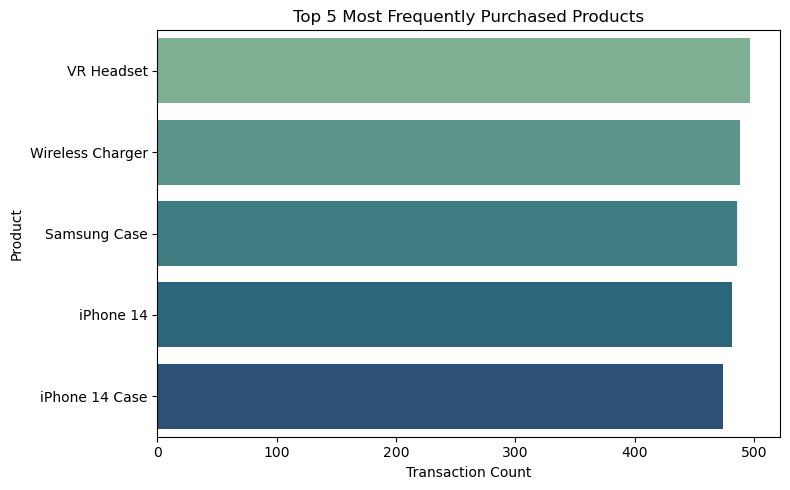

In [3]:
# Ques2
top5_prod = prod_counts.head(5)

# Horizontal bar chart of top 5 products
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_prod.values, y=top5_prod.index, palette="crest")
plt.title("Top 5 Most Frequently Purchased Products")
plt.xlabel("Transaction Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


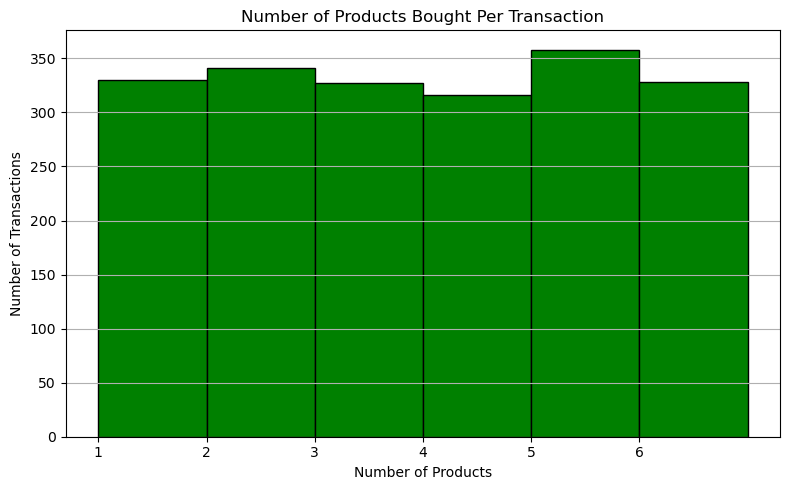

3.5075

In [4]:
# Count number of items bought in each transaction
items_per_transaction = df.drop(columns="TransactionID").sum(axis=1)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(items_per_transaction, bins=range(1, items_per_transaction.max() + 2), color='green', edgecolor='black')
plt.title("Number of Products Bought Per Transaction")
plt.xlabel("Number of Products")
plt.ylabel("Number of Transactions")
plt.xticks(range(1, items_per_transaction.max() + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate average
average_items = items_per_transaction.mean()
average_items


C:\Users\singh\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


🔝 Top 10 Frequently Bought Product Pairs:
     support                             itemsets
33    0.0690       (iPhone 14 Case, Samsung Case)
52    0.0665       (Wireless Charger, VR Headset)
108   0.0640        (Car Phone Mount, VR Headset)
35    0.0630        (iPhone 14 Case, USB-C Cable)
48    0.0630  (Car Phone Mount, Wireless Charger)
20    0.0615            (Samsung Case, iPhone 14)
117   0.0615       (VR Headset, Smartwatch Strap)
45    0.0615     (Samsung Case, Wireless Charger)
36    0.0610    (iPhone 14 Case, Car Phone Mount)
37    0.0610       (iPhone 14 Case, Tablet Stand)


C:\Users\singh\AppData\Local\Temp\ipykernel_9384\2644623219.py:28: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\singh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


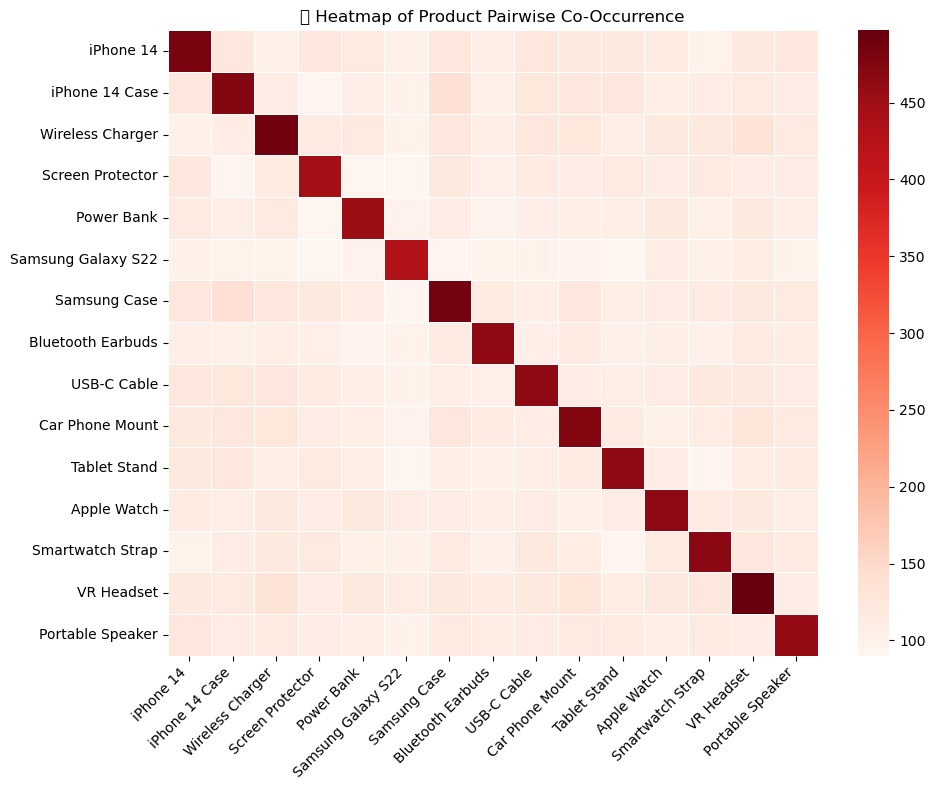

In [5]:
# ques4 

from mlxtend.frequent_patterns import apriori, association_rules


# Step 4: Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(prod_df, min_support=0.01, use_colnames=True)

# Step 5: Filter only itemsets of size 2 (pairs)
pair_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

# Step 6: Sort by support to find top pairs
top_pairs = pair_itemsets.sort_values(by='support', ascending=False).head(10)

# Display top pairs
print("🔝 Top 10 Frequently Bought Product Pairs:")
print(top_pairs)

# Step 7: Create and visualize a heatmap of pairwise co-occurrence
co_matrix = prod_df.T.dot(prod_df)  # co-occurrence matrix
co_df = pd.DataFrame(co_matrix, index=prod_df.columns, columns=prod_df.columns)

plt.figure(figsize=(10, 8))
sns.heatmap(co_df, cmap='Reds', linewidths=0.5)
plt.title("🔻 Heatmap of Product Pairwise Co-Occurrence")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\singh\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\singh\AppData\Local\Temp\ipykernel_9384\196405836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_itemsets['itemsets_str'] = pair_itemsets['itemsets'].apply(lambda x: ', '.join(sorted(list(x))))


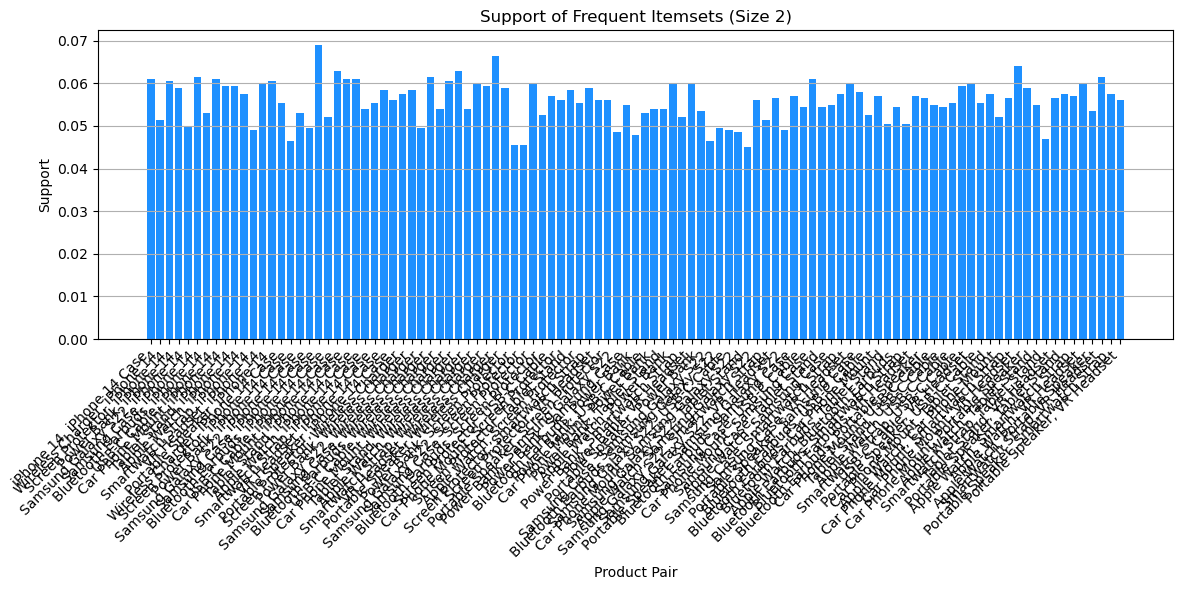

In [7]:

# Step 1: Run Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(prod_df, min_support=0.01, use_colnames=True)

# Step 2: Filter only itemsets of size 2
pair_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]

# Step 3: Convert itemsets to string labels for visualization
pair_itemsets['itemsets_str'] = pair_itemsets['itemsets'].apply(lambda x: ', '.join(sorted(list(x))))

# Step 4: Plot support values as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(pair_itemsets['itemsets_str'], pair_itemsets['support'], color='dodgerblue')
plt.title("Support of Frequent Itemsets (Size 2)")
plt.xlabel("Product Pair")
plt.ylabel("Support")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


C:\Users\singh\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\singh\AppData\Local\Temp\ipykernel_9384\530085182.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


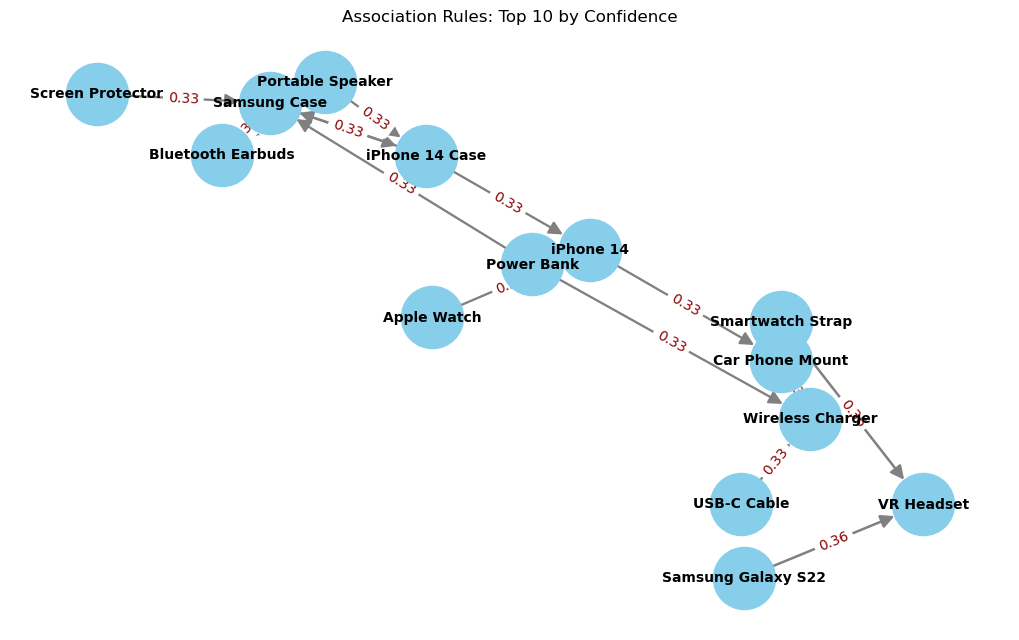

In [15]:

# Step 3: Apply Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(prod_df, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules using confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Step 5: Sort top rules by confidence
top_rules = rules.sort_values(by="confidence", ascending=False).head(10)

# Step 6: Build a directed graph
G = nx.DiGraph()

# Add edges with confidence labels
for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['confidence'], label=f"{row['confidence']:.2f}")

# Step 7: Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [d['weight'] * 5 for _, _, d in edges]  # scale edge width
labels = nx.get_edge_attributes(G, 'label')

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue',
        font_size=10, font_weight='bold', edge_color='gray', width=weights,
        arrows=True, arrowsize=20)

# Add edge labels for confidence
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='darkred')

plt.title("Association Rules: Top 10 by Confidence")
plt.tight_layout()
plt.show()
